<h1 Style = 'color:#4d8da0; text-align:center'>Universidad Castro Carazo</h1>
<h3 Style = 'color:#3f7c78; text-align:center'>Curso: Análisis de Datos</h3>
<h3 Style = 'color:#3f7c78; text-align:center'>Alumno: Jason Anchia Araya</h3>



<img src="bienes_raices.jpg">


<h2 Style = 'color:#3f7c78; text-align:justify'>BIENES Y RAICES PK2</h2>

<p Style = 'text-align: justify'>El presente análisis pretende generar insumos que ayuden a la toma de decisiones a la compañía PK2 en lo que consierne a la incursión en bienes y raíces de los Estados Unidos.</p>

<ol>
    <li>Importación de librerías</li>
    <li>Carga de Set de datos</li>
    <li>Integración de los Set de datos</li>
    <li>Trabajo con valores flotantes</li>
    <li>Normalización de los datos</li>
    <li>Estandarización de los datos</li>
    <li>Agrupación de los datos</li>
    <li>Graficado de los datos</li>
</ol>


<p style = 'text-align:right'>13/06/2023</p>
<h3 Style = 'color:#469272'>1. Importación de librerías</h3>

In [1]:
import pandas as pd #para el manejo de dataFrame
import numpy as np #Pra el manejo de colecciones de datos Listas, tuplas, dicciones...
import matplotlib.pyplot as plt #para generar gráficas
import datetime
import matplotlib as mpl #para generar gráficas

<h3 Style = 'color:#469272'>2. Carga de datos</h3>

In [2]:
df = pd.read_csv("DataSet.csv", sep=";")

C:\Users\vgt\AppData\Local\Temp\ipykernel_13408\2969288642.py:1: DtypeWarning: Columns (9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("DataSet.csv", sep=";")


In [3]:
df.drop(['AS'],axis = 1,inplace=True)
df.head(5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks
0,67,2020,13/9/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN
1,20002,2020,10/2/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN
2,200212,2020,3/9/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN
3,200243,2020,13/4/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN
4,200377,2020,7/2/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN


In [4]:
df.shape

(199997, 13)

<h5 Style = 'color:#469272'>2.1 Revición de encabezados del dataFrame</h5>

In [5]:
df.rename({'Serial Number':'Serial_Number','List Year':'List_Year','Date Recorded':'Date_Recorded','Assessed Value':'Assessed_Value','Sale Amount':'Sale_Amount','Sales Ratio':'Sales_Ratio','Property Type':'Property_Type','Residential Type':'Residential_Type','Non Use Code':'Non_Use_Code','Assessor Remarks':'Assessor_Remarks','OPM remarks':'OPM_Remarks'},axis=1,inplace=True)

In [6]:
df.describe()

,Serial_Number,List_Year,Assessed_Value,Sale_Amount,Sales_Ratio
count,1.999970e+05,199997.000000,1.999920e+05,1.999920e+05,199992.000000
mean,1.112856e+06,2007.821492,2.207159e+05,3.917861e+05,2.613483
std,1.273026e+07,8.655661,1.167709e+06,1.129728e+07,395.765138
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.096700e+04,2001.000000,6.916075e+04,1.300000e+05,0.443578
50%,2.040100e+04,2002.000000,1.098900e+05,2.150000e+05,0.524700
75%,2.000610e+05,2020.000000,1.874300e+05,3.550000e+05,0.623200
max,2.000500e+09,2020.000000,1.149242e+08,5.000000e+09,165060.000000


<h3 Style = 'color:#469272'>3. Manejo de valores faltantes</h3>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199997 entries, 0 to 199996
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial_Number     199997 non-null  int64  
 1   List_Year         199997 non-null  int64  
 2   Date_Recorded     199997 non-null  object 
 3   Town              199997 non-null  object 
 4   Address           199992 non-null  object 
 5   Assessed_Value    199992 non-null  float64
 6   Sale_Amount       199992 non-null  float64
 7   Sales_Ratio       199992 non-null  float64
 8   Property_Type     66782 non-null   object 
 9   Residential_Type  60934 non-null   object 
 10  Non_Use_Code      45746 non-null   object 
 11  Assessor_Remarks  14344 non-null   object 
 12  OPM_Remarks       1981 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 19.8+ MB


<h5 Style = 'color:#469272'>3.1 Imputación de valores numéricos</h5>

In [8]:
av_Assessed = df["Assessed_Value"].astype("float").mean(axis=0)
print('La Media es: ',av_Assessed)

La Media es:  220715.8752650106


In [9]:
df["Assessed_Value"].replace(np.nan,220715,inplace=True)

In [10]:
av_saleAmou = df["Sale_Amount"].astype("float").mean(axis=0)
print('La Media es: ',av_saleAmou)

La Media es:  391786.0567823713


In [11]:
df["Sale_Amount"].replace(np.nan,391786,inplace=True)

In [12]:
av_saleRat = df["Sales_Ratio"].astype("float").mean(axis=0)
print('La Media es: ',av_saleRat)

La Media es:  2.6134831495773887


In [13]:
df["Sales_Ratio"].replace(np.nan,2.6,inplace=True)

<h5 Style = 'color:#469272'>3.2 Imputación de valores categoricos</h5>

In [14]:
df["Address"].replace(np.nan,'No_Registra',inplace=True)

In [15]:
df["Property_Type"].replace(np.nan,'No_Registra',inplace=True)

In [16]:
df["Residential_Type"].replace(np.nan,'No_Registra',inplace=True)

In [17]:
df["Non_Use_Code"].replace(np.nan,'No_Registra',inplace=True)

In [18]:
df["Assessor_Remarks"].replace(np.nan,'No_Registra',inplace=True)

In [19]:
df["OPM_Remarks"].replace(np.nan,'No_Registra',inplace=True)

<h5 Style = 'color:#469272'>3.3 Eliminar filas con valores faltantes</h5>

In [20]:
df.dropna(subset=['Serial_Number'],axis=0,inplace=True)

In [21]:
df.reset_index(drop=True, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199997 entries, 0 to 199996
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial_Number     199997 non-null  int64  
 1   List_Year         199997 non-null  int64  
 2   Date_Recorded     199997 non-null  object 
 3   Town              199997 non-null  object 
 4   Address           199997 non-null  object 
 5   Assessed_Value    199997 non-null  float64
 6   Sale_Amount       199997 non-null  float64
 7   Sales_Ratio       199997 non-null  float64
 8   Property_Type     199997 non-null  object 
 9   Residential_Type  199997 non-null  object 
 10  Non_Use_Code      199997 non-null  object 
 11  Assessor_Remarks  199997 non-null  object 
 12  OPM_Remarks       199997 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 19.8+ MB


In [23]:
dfTemp = df.isnull()
for column in dfTemp.columns.values.tolist():
    print(column)
    print(dfTemp[column].value_counts())
    print("")

Serial_Number
False    199997
Name: Serial_Number, dtype: int64

List_Year
False    199997
Name: List_Year, dtype: int64

Date_Recorded
False    199997
Name: Date_Recorded, dtype: int64

Town
False    199997
Name: Town, dtype: int64

Address
False    199997
Name: Address, dtype: int64

Assessed_Value
False    199997
Name: Assessed_Value, dtype: int64

Sale_Amount
False    199997
Name: Sale_Amount, dtype: int64

Sales_Ratio
False    199997
Name: Sales_Ratio, dtype: int64

Property_Type
False    199997
Name: Property_Type, dtype: int64

Residential_Type
False    199997
Name: Residential_Type, dtype: int64

Non_Use_Code
False    199997
Name: Non_Use_Code, dtype: int64

Assessor_Remarks
False    199997
Name: Assessor_Remarks, dtype: int64

OPM_Remarks
False    199997
Name: OPM_Remarks, dtype: int64



<h3 Style = 'color:#469272'>4. Estandarización de datos</h3>

In [24]:
df ['Date_Recorded'] = df ['Date_Recorded'].astype("datetime64")


C:\Users\vgt\AppData\Local\Temp\ipykernel_13408\1880686363.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df ['Date_Recorded'] = df ['Date_Recorded'].astype("datetime64")


In [25]:
df ['Sale_Amount'] = df ['Sale_Amount'].astype("int64")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199997 entries, 0 to 199996
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial_Number     199997 non-null  int64         
 1   List_Year         199997 non-null  int64         
 2   Date_Recorded     199997 non-null  datetime64[ns]
 3   Town              199997 non-null  object        
 4   Address           199997 non-null  object        
 5   Assessed_Value    199997 non-null  float64       
 6   Sale_Amount       199997 non-null  int64         
 7   Sales_Ratio       199997 non-null  float64       
 8   Property_Type     199997 non-null  object        
 9   Residential_Type  199997 non-null  object        
 10  Non_Use_Code      199997 non-null  object        
 11  Assessor_Remarks  199997 non-null  object        
 12  OPM_Remarks       199997 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memor

In [27]:
df['fx_Year_Sale'] = df['Date_Recorded'].dt.year

In [28]:
df['fx_Ganancia'] = df['Sale_Amount']-df['Assessed_Value']

In [29]:
df.head(5)

,Serial_Number,List_Year,Date_Recorded,Town,Address,Assessed_Value,Sale_Amount,Sales_Ratio,Property_Type,Residential_Type,Non_Use_Code,Assessor_Remarks,OPM_Remarks,fx_Year_Sale,fx_Ganancia
0,67,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000,0.4630,Commercial,No_Registra,No_Registra,No_Registra,No_Registra,2021,174500.0
1,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000.0,430000,0.5883,Residential,Single Family,No_Registra,No_Registra,No_Registra,2020,177000.0
2,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400.0,179900,0.7248,Residential,Condo,No_Registra,No_Registra,No_Registra,2021,49500.0
3,200243,2020,2021-04-13,Avon,111 NORTHINGTON DRIVE,619290.0,890000,0.6958,Residential,Single Family,No_Registra,No_Registra,No_Registra,2021,270710.0
4,200377,2020,2021-07-02,Avon,70 FAR HILLS DRIVE,862330.0,1447500,0.5957,Residential,Single Family,No_Registra,No_Registra,No_Registra,2021,585170.0


In [30]:
dfTempo= df[['fx_Year_Sale','Sale_Amount']]
dfTempo.head(5)

,fx_Year_Sale,Sale_Amount
0,2021,325000
1,2020,430000
2,2021,179900
3,2021,890000
4,2021,1447500


<h3 Style = 'color:#469272'>5. Visualización de datos</h3>

<h5 Style = 'color:#469272'>5.1 Configuración de gráficos</h5>

In [31]:
#Remove all axis
mpl.rcParams["axes.spines.bottom"] = True
mpl.rcParams["axes.spines.left"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

In [32]:
gf = dfTempo.groupby(['fx_Year_Sale']).sum()
gf = gf.iloc[:,:1]
gf.rename({'Sale_Amount':'Total_venta'},axis =1,inplace = True)
gf

,Total_venta
fx_Year_Sale,
2001,3175872755
2002,15476278657
2003,13919539142
2004,4784166867
2005,7239100
2006,29505757
2007,59070121
2008,29133190
2009,23384861


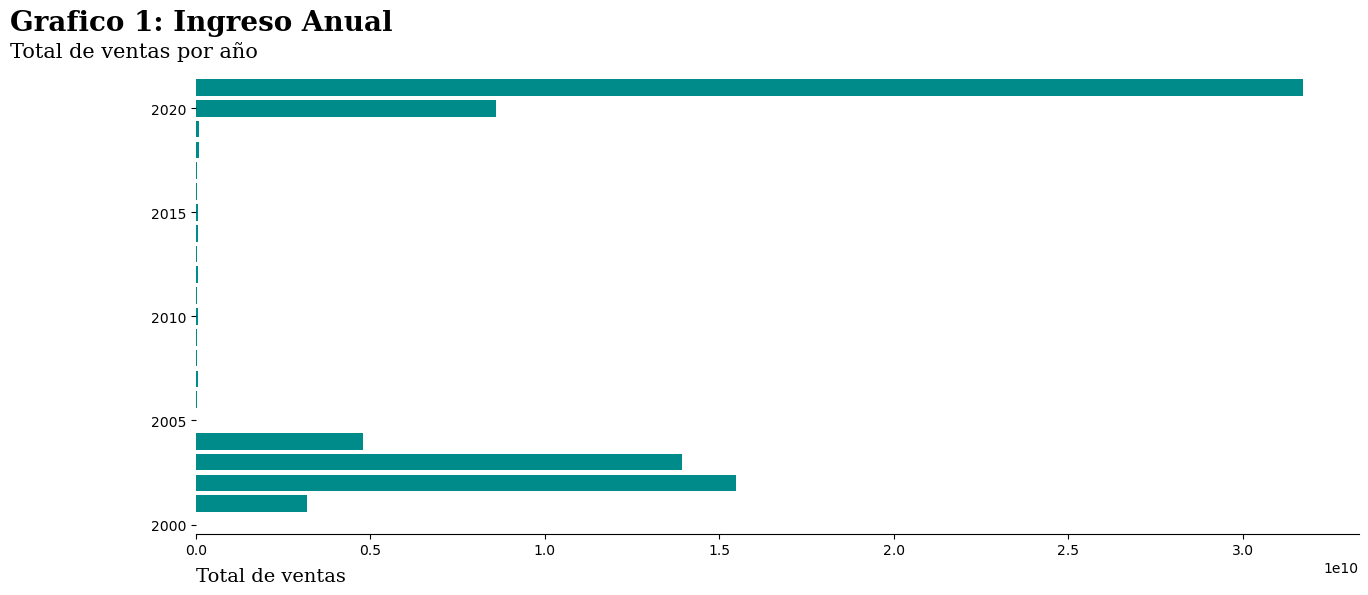

In [33]:
#def add_value_label(x_list,y_list):
#    for i in range(1,len(x_list)+1):
#        plt.text(i,y_list[i-1]/2,y_list[i-1], ha="center")


fig, ax = plt.subplots(1,1, figsize=(15,6.9), dpi=100)


eje_x = gf.index.tolist()
data = gf['Total_venta'].tolist()


#add_value_label(eje_x,data)
 

bar_colors = ['#008B8B']
ax.barh(eje_x, data, color=bar_colors)

 

#--------------------------------------------------------------------------------------------------------------------#
#--------------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EJES DEL GRAFICO ------------------------------------#
#--------------------------------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO
title = "Grafico 1: Ingreso Anual"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif")
             #fontname = "Liberation Sans Narrow"

 

#FORMATO DEL SUBTITULO
subTitle = "Total de ventas por año"
ax.set_title(subTitle,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

#FORMATO DE LOS EJES
etiqueta = "Total de ventas"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 14,
              fontweight = "regular",
              fontfamily = "serif")

 

#CONFIGURACION DE COORDENADAS DE LA ETIQUETA DEL EJE X
ax.xaxis.set_label_coords(x=0,
                          y=-0.07,
                          transform=ax.transAxes)

 

#CONFIGURACION EL TAMANO DEL TEXTO DEL EJE Y
ax.tick_params(axis='both',
               labelsize=10)

 

#CONFIGURACION LA UBICACION DEL GRAFICO
plt.subplots_adjust(top=0.80)
plt.show()



In [34]:
gf2 = df.groupby(['Property_Type']).count()
gf2 = gf2.iloc[0:,:1]
gf2.rename({'Serial_Number':'Cantidad_Ventas'},axis =1,inplace = True)
gf2 = gf2.sort_values('Cantidad_Ventas',ascending = False)

gf2


,Cantidad_Ventas
Property_Type,
No_Registra,133215
Residential,60558
Vacant Land,3156
Commercial,1975
Apartments,485
Condo,371
Industrial,227
Public Utility,5
Single Family,2


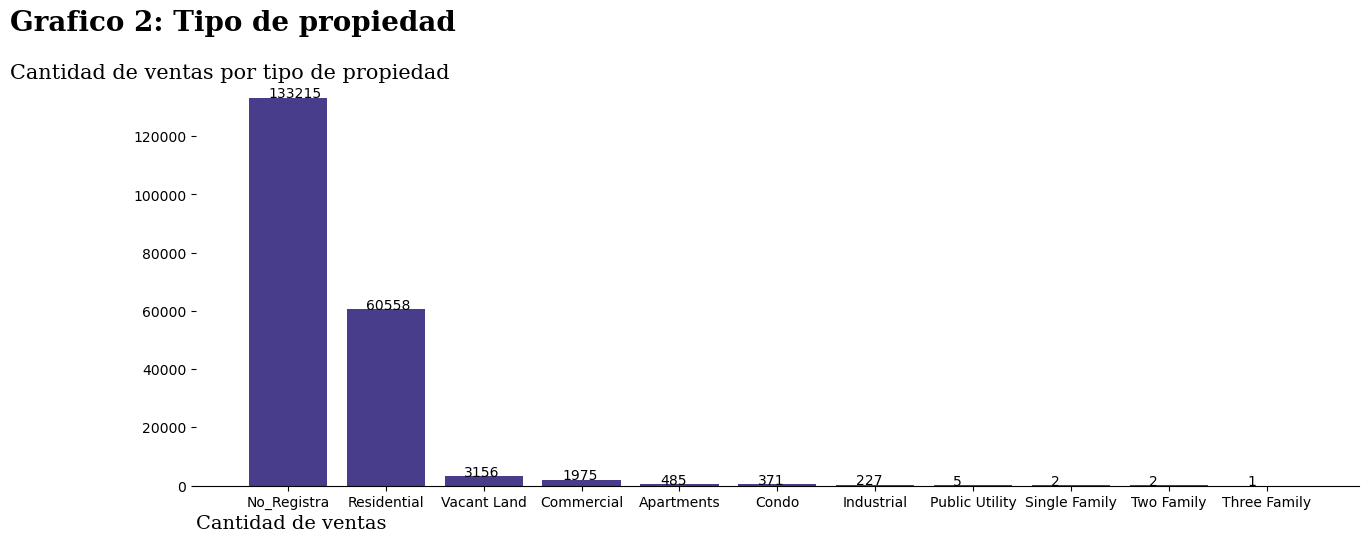

In [35]:



fig, ax = plt.subplots(1,1, figsize=(15,6.9), dpi=100)


eje_x = gf2.index.tolist()
data = gf2['Cantidad_Ventas'].tolist()

co = np.arange(len(data))
for i,j in zip(co,data):
    ax.annotate(j, xy=(i -0.2,j+1))
 

bar_colors = ['#483D8B']
ax.bar(eje_x, data, color=bar_colors)

 

#--------------------------------------------------------------------------------------------------------------------#
#--------------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EJES DEL GRAFICO ------------------------------------#
#--------------------------------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO
title = "Grafico 2: Tipo de propiedad"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif")
             #fontname = "Liberation Sans Narrow"

 

#FORMATO DEL SUBTITULO
subTitle = "Cantidad de ventas por tipo de propiedad"
ax.set_title(subTitle,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.70,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

#FORMATO DE LOS EJES
etiqueta = "Cantidad de ventas"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 14,
              fontweight = "regular",
              fontfamily = "serif")

 

#CONFIGURACION DE COORDENADAS DE LA ETIQUETA DEL EJE X
ax.xaxis.set_label_coords(x=0,
                          y=-0.07,
                          transform=ax.transAxes)

 

#CONFIGURACION EL TAMANO DEL TEXTO DEL EJE Y
ax.tick_params(axis='both',
               labelsize=10)

 

#CONFIGURACION LA UBICACION DEL GRAFICO
plt.subplots_adjust(top=0.70)
plt.show()



In [36]:
gf3 = df.groupby(['Town']).count()
gf3 = gf3.iloc[0:,:1]
gf3.rename({'Serial_Number':'Cantidad_Ventas'},axis =1,inplace = True)
gf3 = gf3.sort_values('Cantidad_Ventas',ascending = False)

gf3

,Cantidad_Ventas
Town,
Stamford,7853
Bridgeport,5977
Norwalk,5872
Danbury,4667
Hartford,4398
...,...
Bozrah,95
Canaan,81
Union,79


In [37]:
gf3.describe()

,Cantidad_Ventas
count,169.000000
mean,1183.414201
std,1239.804120
min,48.000000
25%,357.000000
50%,812.000000
75%,1473.000000
max,7853.000000


In [38]:
#bins = np.linspace(min(gf3['Cantidad_Ventas']),max(gf3['Cantidad_Ventas']),4)
bins = np.linspace(48,7853,3)
bins

array([  48. , 3950.5, 7853. ])

In [51]:
categorias = ["Bajo Mercado","Alto Mercado"]
gf3["Town (cat)"] = pd.cut(gf3['Cantidad_Ventas'], bins, labels=categorias,
                                     include_lowest=True)
df_mask=gf3['Town (cat)']=="Alto Mercado"
gf3temp=gf3[df_mask]
gf3temp.head()

,Cantidad_Ventas,Town (cat)
Town,,
Stamford,7853,Alto Mercado
Bridgeport,5977,Alto Mercado
Norwalk,5872,Alto Mercado
Danbury,4667,Alto Mercado
Hartford,4398,Alto Mercado


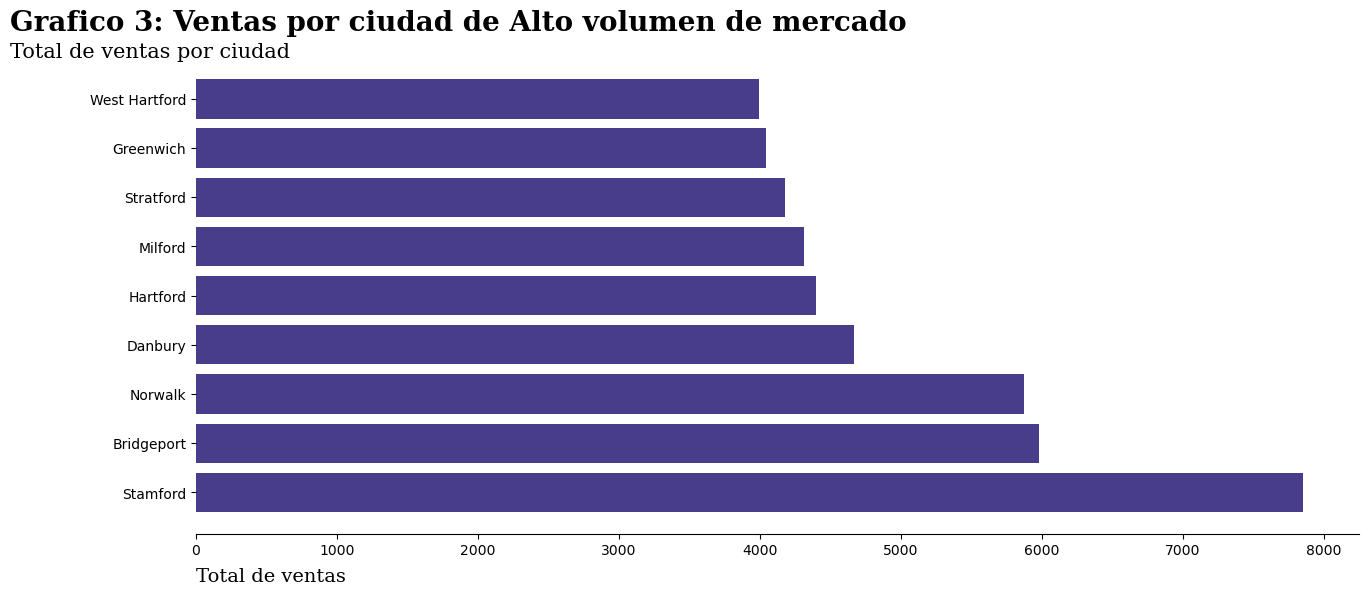

In [40]:
fig, ax = plt.subplots(1,1, figsize=(15,6.9), dpi=100)


eje_x = gf3temp.index.tolist()
data = gf3temp['Cantidad_Ventas'].tolist()



co = np.arange(len(eje_x))
for i,j in zip(co,data):
    ax.annotate(j, xy=(i -0.2,j+1))

bar_colors = ['#483D8B']
ax.barh(eje_x, data, color=bar_colors)

 

#--------------------------------------------------------------------------------------------------------------------#
#--------------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EJES DEL GRAFICO ------------------------------------#
#--------------------------------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO
title = "Grafico 3: Ventas por ciudad de Alto volumen de mercado"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif")
             #fontname = "Liberation Sans Narrow"

 

#FORMATO DEL SUBTITULO
subTitle = "Total de ventas por ciudad"
ax.set_title(subTitle,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

#FORMATO DE LOS EJES
etiqueta = "Total de ventas"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 14,
              fontweight = "regular",
              fontfamily = "serif")

 

#CONFIGURACION DE COORDENADAS DE LA ETIQUETA DEL EJE X
ax.xaxis.set_label_coords(x=0,
                          y=-0.07,
                          transform=ax.transAxes)

 

#CONFIGURACION EL TAMANO DEL TEXTO DEL EJE Y
ax.tick_params(axis='both',
               labelsize=10)

 

#CONFIGURACION LA UBICACION DEL GRAFICO
plt.subplots_adjust(top=0.80)
plt.show()



In [41]:
gf= df[['Property_Type','Sale_Amount']]
gf = gf[gf['Property_Type'].isin(['Commercial','Residential'])]
gf = gf.groupby(['Property_Type']).mean()
gf = gf.iloc[:,:1]
gf.rename({'Sale_Amount':'Promedio_venta'},axis =1,inplace = True)
gf['Promedio_venta']=gf['Promedio_venta'].astype("int64")
gf


,Promedio_venta
Property_Type,
Commercial,1789659
Residential,479698


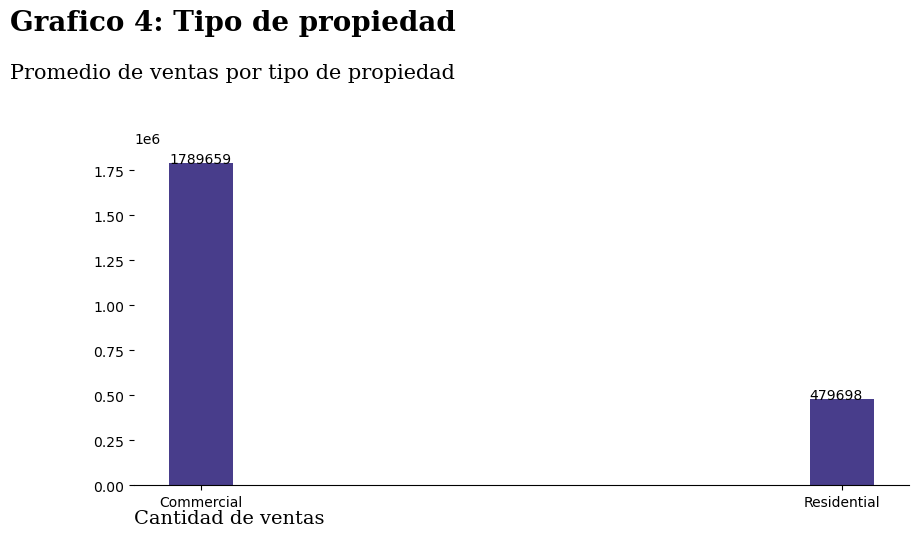

In [42]:
#def add_value_label(x_list,y_list):
#    for i in range(1,len(x_list)+1):
#       plt.text(i,y_list[i-1]/2,y_list[i-1], ha="center")


fig, ax = plt.subplots(1,1, figsize=(10,6.9), dpi=100)


eje_x = gf.index.tolist()
data = gf['Promedio_venta'].tolist()

co = np.arange(len(data))
for i,j in zip(co,data):
    ax.annotate(j, xy=(i -0.05,j+0.1))


#add_value_label(eje_x,data)
 

bar_colors = ['#483D8B']

ax.bar(eje_x, data, color=bar_colors,width=0.1)

 

#--------------------------------------------------------------------------------------------------------------------#
#--------------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EJES DEL GRAFICO ------------------------------------#
#--------------------------------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO
title = "Grafico 4: Tipo de propiedad"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif")
             #fontname = "Liberation Sans Narrow"

 

#FORMATO DEL SUBTITULO
subTitle = "Promedio de ventas por tipo de propiedad"
ax.set_title(subTitle,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.70,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

#FORMATO DE LOS EJES
etiqueta = "Cantidad de ventas"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 14,
              fontweight = "regular",
              fontfamily = "serif")

 

#CONFIGURACION DE COORDENADAS DE LA ETIQUETA DEL EJE X
ax.xaxis.set_label_coords(x=0,
                          y=-0.07,
                          transform=ax.transAxes)

 

#CONFIGURACION EL TAMANO DEL TEXTO DEL EJE Y
ax.tick_params(axis='both',
               labelsize=10)


 

#CONFIGURACION LA UBICACION DEL GRAFICO
plt.subplots_adjust(top=0.60)
plt.show()



In [43]:
#Residential_Type
dfTempo= df[['Residential_Type','Property_Type']]
ft = dfTempo[dfTempo['Property_Type'].isin(['Residential'])]
ft = ft.groupby(['Residential_Type']).count()
#ft = gf.iloc[0:,:1]
ft.rename({'Property_Type':'Frecuencia'},axis =1,inplace = True)
#gf
ft

,Frecuencia
Residential_Type,
Condo,12330
Four Family,268
Single Family,43271
Three Family,1491
Two Family,3198


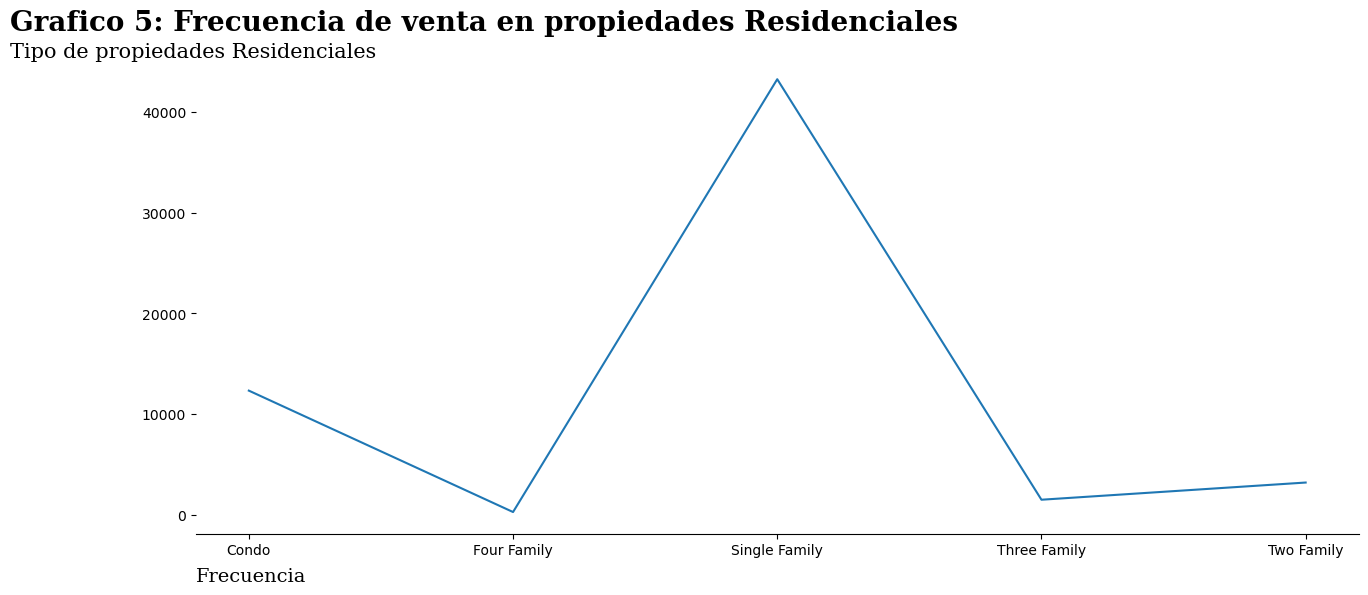

In [44]:
fig, ax = plt.subplots(1,1, figsize=(15,6.9), dpi=100)


eje_x = ft.index.tolist()
data = ft['Frecuencia'].tolist()


#add_value_label(eje_x,data)
 
ax.plot(eje_x,data)
    
#bar_colors = ['#008B8B']
#ax.barh(eje_x, data, color=bar_colors)

 

#--------------------------------------------------------------------------------------------------------------------#
#--------------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EJES DEL GRAFICO ------------------------------------#
#--------------------------------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO
title = "Grafico 5: Frecuencia de venta en propiedades Residenciales"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif")
             #fontname = "Liberation Sans Narrow"

 

#FORMATO DEL SUBTITULO
subTitle = "Tipo de propiedades Residenciales"
ax.set_title(subTitle,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

#FORMATO DE LOS EJES
etiqueta = "Frecuencia"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 14,
              fontweight = "regular",
              fontfamily = "serif")

 

#CONFIGURACION DE COORDENADAS DE LA ETIQUETA DEL EJE X
ax.xaxis.set_label_coords(x=0,
                          y=-0.07,
                          transform=ax.transAxes)

 

#CONFIGURACION EL TAMANO DEL TEXTO DEL EJE Y
ax.tick_params(axis='both',
               labelsize=10)

 

#CONFIGURACION LA UBICACION DEL GRAFICO
plt.subplots_adjust(top=0.80)
plt.show()



In [45]:
dfTempo= df[['Property_Type','fx_Ganancia']]
df_mask=dfTempo['Property_Type']!="No_Registra"
gf3temp=dfTempo[df_mask]
gf3temp = gf3temp.groupby(['Property_Type']).mean()
gf3temp['fx_Ganancia']=gf3temp['fx_Ganancia'].astype("int64")
gf3temp = gf3temp.sort_values('fx_Ganancia',ascending = True)
gf3temp.loc['Promedio_General']=gf3temp.mean(axis=0)
gf3temp

,fx_Ganancia
Property_Type,
Three Family,-156740.0
Condo,78012.0
Two Family,80150.0
Single Family,82335.0
Vacant Land,178816.0
Residential,189917.0
Public Utility,296242.0
Commercial,411565.0
Industrial,802976.0


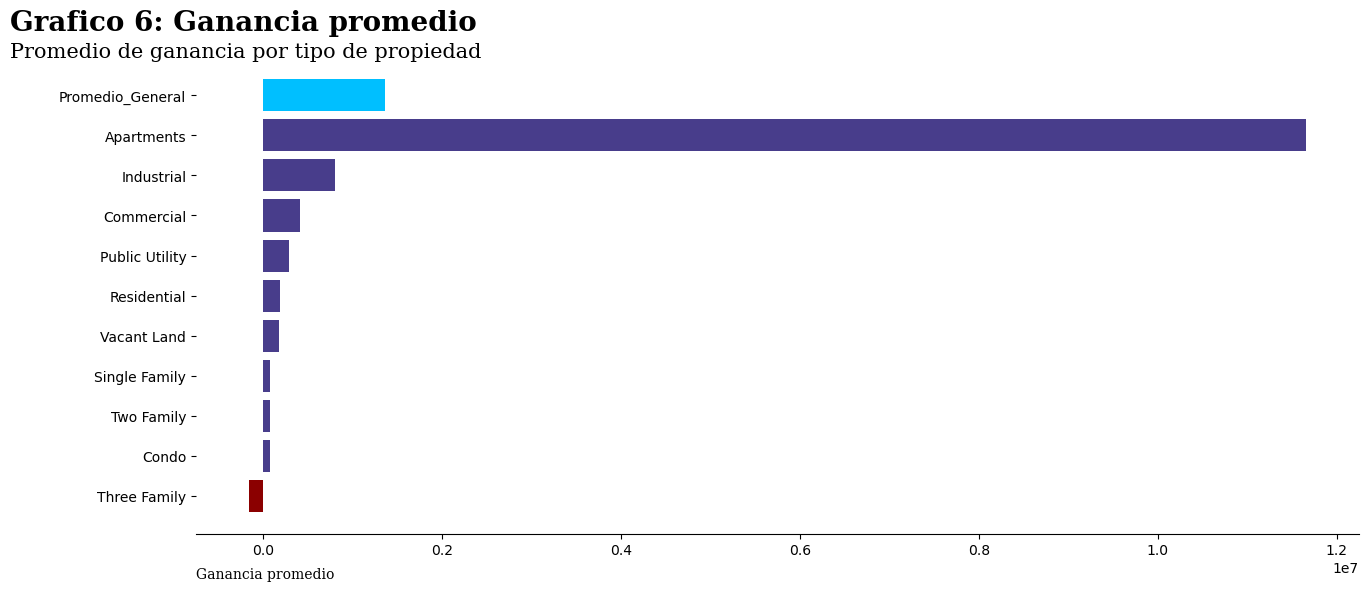

In [46]:
fig, ax = plt.subplots(1,1, figsize=(15,6.9), dpi=100)

 

eje_x = gf3temp.index.tolist()
data = gf3temp['fx_Ganancia'].tolist()

 

bar_colors = ['#8B0000','#483D8B','#483D8B','#483D8B','#483D8B','#483D8B','#483D8B','#483D8B','#483D8B','#483D8B',
              '#00BFFF']
ax.barh(eje_x, data, color=bar_colors)

 

#--------------------------------------------------------------------------------------------------------------------#
#--------------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EJES DEL GRAFICO ------------------------------------#
#--------------------------------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO
title = "Grafico 6: Ganancia promedio"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif")
             #fontname = "Liberation Sans Narrow"

 

#FORMATO DEL SUBTITULO
subTitle = "Promedio de ganancia por tipo de propiedad"
ax.set_title(subTitle,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

#FORMATO DE LOS EJES
etiqueta = "Ganancia promedio"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

 

#CONFIGURACION DE COORDENADAS DE LA ETIQUETA DEL EJE X
ax.xaxis.set_label_coords(x=0,
                          y=-0.07,
                          transform=ax.transAxes)

 

#CONFIGURACION EL TAMANO DEL TEXTO DEL EJE Y
ax.tick_params(axis='both',
               labelsize=10)

 

#CONFIGURACION LA UBICACION DEL GRAFICO
plt.subplots_adjust(top=0.80)
plt.show()


In [49]:
df.describe()

,Serial_Number,List_Year,Assessed_Value,Sale_Amount,Sales_Ratio,fx_Year_Sale,fx_Ganancia
count,1.999970e+05,199997.000000,1.999970e+05,1.999970e+05,199997.000000,199997.000000,1.999970e+05
mean,1.112856e+06,2007.821492,2.207159e+05,3.917861e+05,2.613483,2008.574879,1.710702e+05
std,1.273026e+07,8.655661,1.167694e+06,1.129714e+07,395.760191,8.649188,1.129212e+07
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000,2001.000000,-7.497597e+07
25%,1.096700e+04,2001.000000,6.916100e+04,1.300000e+05,0.443579,2002.000000,5.409000e+04
50%,2.040100e+04,2002.000000,1.099000e+05,2.150000e+05,0.524706,2003.000000,1.008860e+05
75%,2.000610e+05,2020.000000,1.874300e+05,3.550000e+05,0.623200,2020.000000,1.755000e+05
max,2.000500e+09,2020.000000,1.149242e+08,5.000000e+09,165060.000000,2021.000000,4.997761e+09


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199997 entries, 0 to 199996
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial_Number     199997 non-null  int64         
 1   List_Year         199997 non-null  int64         
 2   Date_Recorded     199997 non-null  datetime64[ns]
 3   Town              199997 non-null  object        
 4   Address           199997 non-null  object        
 5   Assessed_Value    199997 non-null  float64       
 6   Sale_Amount       199997 non-null  int64         
 7   Sales_Ratio       199997 non-null  float64       
 8   Property_Type     199997 non-null  object        
 9   Residential_Type  199997 non-null  object        
 10  Non_Use_Code      199997 non-null  object        
 11  Assessor_Remarks  199997 non-null  object        
 12  OPM_Remarks       199997 non-null  object        
 13  fx_Year_Sale      199997 non-null  int64         
 14  fx_G

In [68]:
dfTempo= df[['Town','Property_Type']]
ft = dfTempo[dfTempo['Town'].isin(['Stamford','Bridgeport','Norwalk','Danbury','Hartford','Milford','Stratford','Greenwich','West Hartford'])]
ft = dfTempo[dfTempo['Property_Type'].isin(['Apartments','Commercial','Condo','Industrial','Residential','Three Family','Vacant Land	'])]
#ft = dfTempo[dfTempo['Town'].isin(['Stamford'])]
ft = ft.groupby(['Property_Type']).count()
#ft = gf.iloc[0:,:1]
ft.rename({'Town':'Cantidad'},axis =1,inplace = True)
#gf
ft

,Cantidad
Property_Type,
Apartments,485
Commercial,1975
Condo,371
Industrial,227
Residential,60558
Three Family,1


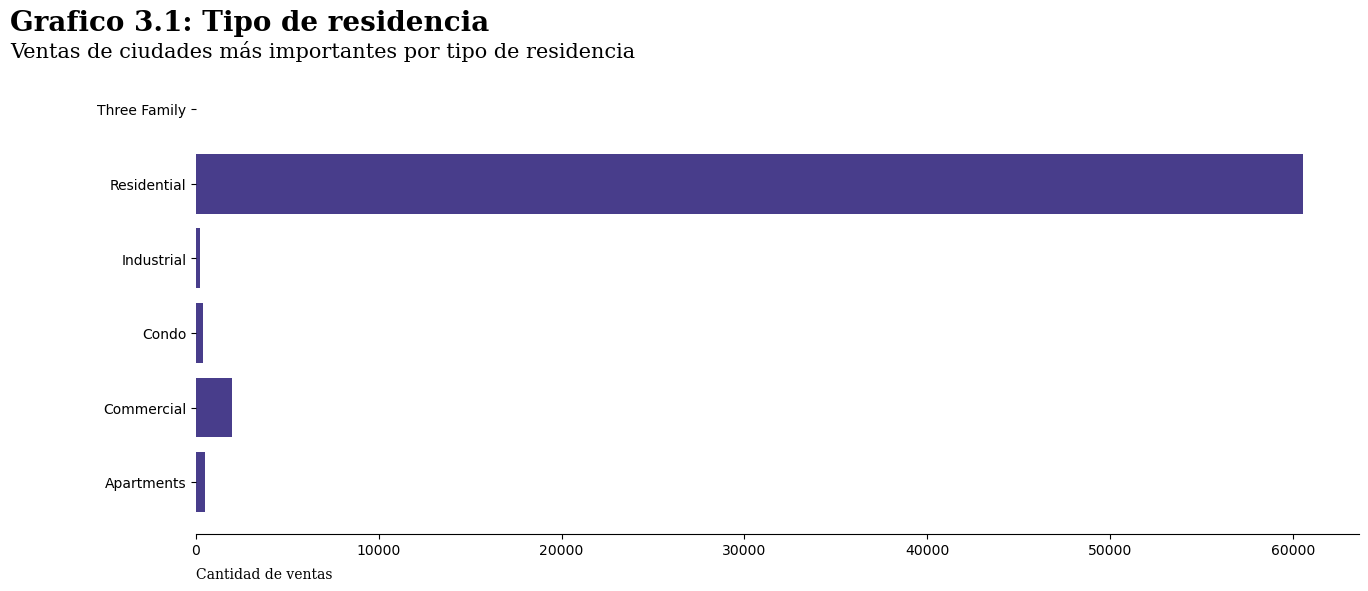

In [69]:
fig, ax = plt.subplots(1,1, figsize=(15,6.9), dpi=100)

 

eje_x = ft.index.tolist()
data = ft['Cantidad'].tolist()

 

bar_colors = ['#483D8B','#483D8B','#483D8B','#483D8B','#483D8B','#483D8B','#483D8B','#483D8B','#483D8B','#483D8B',
              '#483D8B']
ax.barh(eje_x, data, color=bar_colors)

 

#--------------------------------------------------------------------------------------------------------------------#
#--------------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EJES DEL GRAFICO ------------------------------------#
#--------------------------------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO
title = "Grafico 3.1: Tipo de residencia"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif")
             #fontname = "Liberation Sans Narrow"

 

#FORMATO DEL SUBTITULO
subTitle = "Ventas de ciudades más importantes por tipo de residencia"
ax.set_title(subTitle,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

#FORMATO DE LOS EJES
etiqueta = "Cantidad de ventas"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

 

#CONFIGURACION DE COORDENADAS DE LA ETIQUETA DEL EJE X
ax.xaxis.set_label_coords(x=0,
                          y=-0.07,
                          transform=ax.transAxes)

 

#CONFIGURACION EL TAMANO DEL TEXTO DEL EJE Y
ax.tick_params(axis='both',
               labelsize=10)

 

#CONFIGURACION LA UBICACION DEL GRAFICO
plt.subplots_adjust(top=0.80)
plt.show()
